In [1]:
import acquire as a


import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unicodedata
import re
import seaborn as sns

In [2]:
#process only one repo
test= a.process_repo('dsfsi/covid19za')

In [3]:
#take a look
test

{'repo': 'dsfsi/covid19za',
 'language': 'Jupyter Notebook',
 'readme_contents': "# Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa\n\n[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.3819126.svg)](https://doi.org/10.5281/zenodo.3819126) [![dsJournal](https://img.shields.io/badge/DSJournal-10.5334-B31B1B.svg)](https://doi.org/10.5334/dsj-2020-019)\n\nCoronavirus COVID-19 (2019-nCoV) Data Repository for South Africa created, maintained and hosted by [Data Science for Social Impact research group](https://dsfsi.github.io/), led by Dr. Vukosi Marivate, at the University of Pretoria.\n\n**Disclaimer:** We have worked to keep the data as accurate as possible. We collate the COVID 19 reporting data from NICD and DoH. We only update that data once there is an official report or statement. For the other data, we work to keep the data as accurate as possible. If you find errors. Make a pull request.\n\n*If you use this repo for any research/development/innovation, please co

In [4]:
scrape_data = a.scrape_github_data()

In [5]:
df = pd.DataFrame(scrape_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             152 non-null    object
 1   language         133 non-null    object
 2   readme_contents  152 non-null    object
dtypes: object(3)
memory usage: 3.7+ KB


In [6]:
df.shape

(152, 3)

# Prepare

In [7]:
import prepare

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natasharivers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/natasharivers/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df = df.rename({'readme_contents':'original'},axis=1)
df['clean'] = df.original.apply(prepare.basic_clean)
df['lemmatized'] = df.clean.apply(prepare.lemmatize)
df['stopwords_removed'] = df.lemmatized.apply(prepare.remove_stopwords)
df.head()

,repo,language,original,clean,lemmatized,stopwords_removed
0,CSSEGISandData/COVID-19,None,# COVID-19 Data Repository by the Center for S...,covid19 data repository by the center for sys...,covid19 data repository by the center for syst...,covid19 data repository center system science ...
1,covid19india/covid19india-react,JavaScript,"<p align=""center"">\n<img src=""https://reposito...",p aligncenter\nimg srchttpsrepositoryimagesgit...,p aligncenter img srchttpsrepositoryimagesgith...,p aligncenter img srchttpsrepositoryimagesgith...
2,nytimes/covid-19-data,None,# Coronavirus (Covid-19) Data in the United St...,coronavirus covid19 data in the united states...,coronavirus covid19 data in the united state t...,coronavirus covid19 data united state primary ...
3,tokyo-metropolitan-gov/covid19,Vue,# 東京都 新型コロナウイルス感染症対策サイト\n\n[![production deplo...,\n\nproduction deployhttpsgithubcomtokyometr...,production deployhttpsgithubcomtokyometropolit...,production deployhttpsgithubcomtokyometropolit...
4,owid/covid-19-data,Python,# COVID-19 Dataset by _Our World in Data_ \n[!...,covid19 dataset by our world in data \nwebsit...,covid19 dataset by our world in data website s...,covid19 dataset world data website shieldsioht...


In [9]:
def clean(text):
    '''
    This function is a simplified text cleaning function
    '''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [10]:
#see the count for each language
df.language.value_counts()

#python appears to be the most used language

Python              40
JavaScript          29
Jupyter Notebook    17
HTML                 9
TypeScript           5
R                    5
Ruby                 4
Java                 3
Vue                  3
Dart                 3
CSS                  3
C++                  2
SCSS                 2
C#                   2
PHP                  1
Swift                1
Stan                 1
TeX                  1
G-code               1
Kotlin               1
Name: language, dtype: int64

In [11]:
#take a look at all python 
df[df.language == 'Python'].stopwords_removed

4      covid19 dataset world data website shieldsioht...
7      reverse engineering coronavirus sarscov2 start...
10     h1 aligncenter coronavirus tracker api h1 prov...
16     foldinghome covid19 effort repository contain ...
17     covid19 dataset coronavirus disease 2019 covid...
18     build statushttpstravisciorgchrismattmanntikap...
25     p aligncenter img srchttpsrawgithubusercontent...
27     covid19 vaccination slot booking script update...
29     img width30px srcimagesspritzeico vaccipy img ...
30     seirs model framework package implement model ...
37     doctoshotgun script let automatically book vac...
51     socialdistancinganalysercovid19 ai tool preven...
52     table content 1 introductionintroduction 2 mai...
54     automated lung segmentation ct presence severe...
57     covid19 opendata repository attempt assemble l...
66     monoloco library nbspnbsp downloadshttpspepyte...
68     covid19 open data migration notice project par...
70     python covid19 'corona v

In [12]:
#python clean only
python_words = clean(' '.join(df[df.language == 'Python'].stopwords_removed))
python_words

'covid19 dataset world data website shieldsiohttpsimgshieldsiowebsiteupdowngreenredhttpshieldsiosvghttpsourworldindataorgcoronavirus datahttpsimgshieldsiobadgepublicdatapurplepublicdata open source love svg3httpsbadgesfrapsoftcomosv3opensourcesvgv103httpsgithubcomellerbrockopensourcebadges find data covid19 documentation publicdatapublicdata documentation data complete covid19 datasetpublicdatareadmemd data covid19 vaccinationspublicdatavaccinationsreadmemd data excess mortalitypublicdataexcessmortalityreadmemd development generalscriptsreadmemd development vaccinationsscriptsscriptsvaccinationsreadmemd development vaccination contribution guidelinesscriptsscriptsvaccinationscontributemd development testingscriptsscriptstestingreadmemd reverse engineering coronavirus sarscov2 start coronapycoronapy thoughtballoon background project applies technique reverse engineeringhttpsenwikipediaorgwikireverseengineering understand sarscov2httpsenwikipediaorgwikisevereacuterespiratorysyndromecoron

In [13]:
#clean java only
java_words = clean(' '.join(df[df.language == 'JavaScript'].stopwords_removed))

#clean Jupyter Notebook only
jupyter_words = clean(' '.join(df[df.language == 'Jupyter Notebook'].stopwords_removed))

#html clean only
html_words = clean(' '.join(df[df.language == 'HTML'].stopwords_removed))

#r clean only
r_words = clean(' '.join(df[df.language == 'R'].stopwords_removed))

#all clean text
all_words = clean(' '.join(df.stopwords_removed))

# Explore

In [14]:
all_words.split()

['covid19',
 'data',
 'repository',
 'center',
 'system',
 'science',
 'engineering',
 'csse',
 'john',
 'hopkins',
 'university',
 'data',
 'repository',
 '2019',
 'novel',
 'coronavirus',
 'visual',
 'dashboard',
 'operated',
 'john',
 'hopkins',
 'university',
 'center',
 'system',
 'science',
 'engineering',
 'jhu',
 'csse',
 'also',
 'supported',
 'esri',
 'living',
 'atlas',
 'team',
 'john',
 'hopkins',
 'university',
 'applied',
 'physic',
 'lab',
 'jhu',
 'apl',
 'bvisual',
 'dashboard',
 'desktopb',
 'httpswwwarcgiscomappsopsdashboardindexhtmlbda7594740fd40299423467b48e9ecf6',
 'bvisual',
 'dashboard',
 'mobileb',
 'httpwwwarcgiscomappsopsdashboardindexhtml85320e2ea5424dfaaa75ae62e5c06e61',
 'bplease',
 'cite',
 'lancet',
 'article',
 'use',
 'data',
 'publicationb',
 'interactive',
 'webbased',
 'dashboard',
 'track',
 'covid19',
 'real',
 'timehttpsdoiorg101016s1473309920301201',
 'bprovided',
 'john',
 'hopkins',
 'university',
 'center',
 'system',
 'science',
 'engineeri

In [15]:
#turn all words into a series
#get value count of all words
pd.Series(all_words.split()).value_counts()

#removing stopwords would change this count

covid19          1430
data             1367
de                900
1                 721
br                646
                 ... 
eingefrorenen       1
leicht              1
qpcr                1
elektiver           1
knx                 1
Length: 26564, dtype: int64

In [16]:
#create a series with words split and value counts for each word
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
jupyter_freq = pd.Series(jupyter_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()
r_freq = pd.Series(r_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [17]:
python_freq

data                                                            272
model                                                           134
covid19                                                         121
default                                                         102
code                                                             95
                                                               ... 
refhttpswwwimpfterminservicedeassetsstaticimpfzentrenjsonsup      1
inspired                                                          1
tikainitvm                                                        1
hrefhttpibtidameimg                                               1
srchttpsiibbcowg2ypbqcovid19apilogopnga                           1
Length: 7167, dtype: int64

In [23]:
#combine all frequency into single Series
word_counts = pd.concat([python_freq, java_freq, jupyter_freq, html_freq, r_freq, all_freq], axis=1).fillna(0).astype(int)

#word count for each language type
word_counts.columns = ['python', 'java', 'jupyter', 'html', 'r', 'all']

#take a look
word_counts.head(10)

,python,java,jupyter,html,r,all
data,272,273,274,63,88,1367
model,134,20,90,0,0,314
covid19,121,513,207,27,27,1430
default,102,12,6,0,0,169
code,95,34,16,31,1,297
python,93,17,29,2,0,198
2020,93,26,22,38,9,543
use,92,39,29,8,8,301
run,92,32,23,11,2,271
img,88,45,31,5,6,217


In [20]:
#sorted by most common to least common in 'all' 
word_counts.sort_values('all', ascending=False).head(20)

,python,java,jupyter,html,r,all
covid19,121,513,207,27,27,1430
data,272,273,274,63,88,1367
de,44,62,579,0,2,900
1,54,33,41,25,7,721
br,18,30,15,6,0,646
case,85,132,122,45,19,567
2020,93,26,22,38,9,543
coronavirus,38,242,10,8,7,407
using,74,63,37,5,4,398
arxiv,2,0,0,0,0,386


## Visualize

Text(0, 0.5, 'Word')

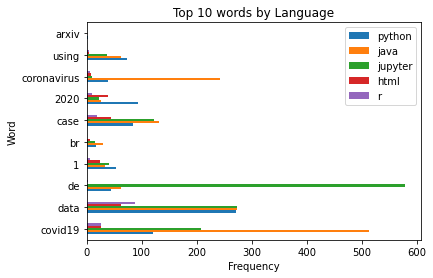

In [24]:
#using 'all' languages
#visualize top 10
word_counts.sort_values('all', ascending=False).head(10)[['python', 'java', 'jupyter', 'html', 'r']].plot.barh()

plt.title('Top 10 words by Language')
plt.xlabel('Frequency')
plt.ylabel('Word')